In [25]:
import pickle
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# ✅ Load preprocessed data
with open('../saved_data/data_split.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

print("Data loaded successfully.")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

# ✅ Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Setup early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ✅ Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    callbacks=[early_stop]
)

# ✅ Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

# ✅ Save the trained model
model.save('../saved_data/deepfake_model.h5')
print("✅ Model saved as deepfake_model.h5")


Data loaded successfully.
X_train: (1636, 128, 128, 3), X_test: (409, 128, 128, 3)


c:\Users\sharm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - accuracy: 0.5007 - loss: 0.9118 - val_accuracy: 0.5030 - val_loss: 0.6931
Epoch 2/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 282ms/step - accuracy: 0.5145 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6909
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 396ms/step - accuracy: 0.5573 - loss: 0.6863 - val_accuracy: 0.5915 - val_loss: 0.6699
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 390ms/step - accuracy: 0.6226 - loss: 0.6518 - val_accuracy: 0.5061 - val_loss: 0.6888
Epoch 5/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 349ms/step - accuracy: 0.6004 - loss: 0.6721 - val_accuracy: 0.5976 - val_loss: 0.6655
Epoch 6/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 351ms/step - accuracy: 0.6427 - loss: 0.6380 - val_accuracy: 0.6250 - val_loss: 0.6529
Epoch 7/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 345ms/step - accuracy: 0.6713 - loss: 0.6201 - val_accuracy: 0.6067 - val_loss: 0.6569
Epoch 8/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 350ms/step - accuracy: 0.7082 - loss: 0.5817 - val_accur


✅ Test Accuracy: 55.50%
✅ Model saved as deepfake_model.h5


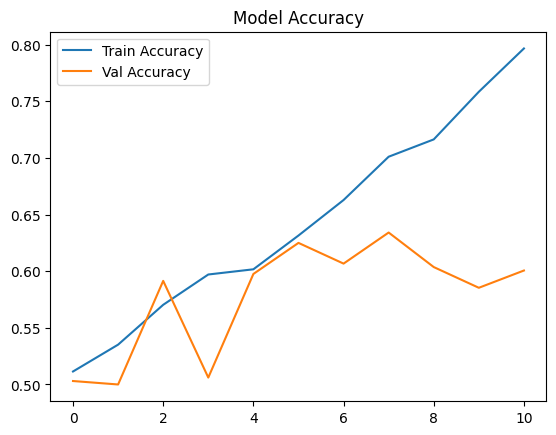

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


In [27]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5622 - loss: 0.7226

✅ Test Accuracy: 55.50%


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype('int').flatten()

# Report
print("✅ Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))

# Confusion matrix
print("✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
✅ Classification Report:
              precision    recall  f1-score   support

        Real       0.60      0.49      0.54       216
        Fake       0.52      0.63      0.57       193

    accuracy                           0.56       409
   macro avg       0.56      0.56      0.55       409
weighted avg       0.56      0.56      0.55       409

✅ Confusion Matrix:
[[106 110]
 [ 72 121]]


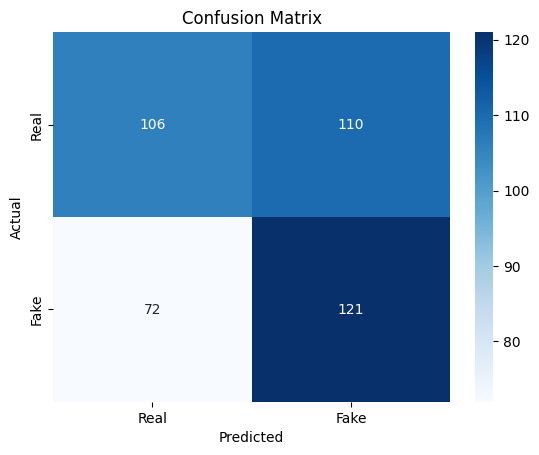

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [24]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# ✅ Load preprocessed data
with open('../saved_data/data_split.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

print(f"✅ Data Loaded: X_train = {X_train.shape}, X_test = {X_test.shape}")

# ✅ Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

# ✅ Load pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze all convolutional layers

# ✅ Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# ✅ Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# ✅ Set early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ✅ Train model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=20,
    callbacks=[early_stop]
)

# ✅ Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc * 100:.2f}%")

# ✅ Save the model
model.save('../saved_data/deepfake_model_mobilenet.h5')
print("✅ Model saved as deepfake_model_mobilenet.h5")


✅ Data Loaded: X_train = (1632, 128, 128, 3), X_test = (409, 128, 128, 3)


c:\Users\sharm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 20s 238ms/step - accuracy: 0.4963 - loss: 0.7827 - val_accuracy: 0.5746 - val_loss: 0.6732
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 16s 309ms/step - accuracy: 0.5506 - loss: 0.7211 - val_accuracy: 0.5746 - val_loss: 0.6662
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 15s 296ms/step - accuracy: 0.5469 - loss: 0.7053 - val_accuracy: 0.5868 - val_loss: 0.6623
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 15s 299ms/step - accuracy: 0.5322 - loss: 0.7124 - val_accuracy: 0.6112 - val_loss: 0.6498
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 15s 297ms/step - accuracy: 0.5793 - loss: 0.6812 - val_accuracy: 0.6235 - val_loss: 0.6480
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 15s 293ms/step - accuracy: 0.6115 - loss: 0.6724 - val_accuracy: 0.6259 - val_loss: 0.6460
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 15s 299ms/step - accuracy: 0.5961 - loss: 0.6545 - val_accuracy: 0.6137 - val_loss: 0.6612
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 326ms/step - accuracy: 0.6065 - loss: 0.6497 - val_accu


✅ Test Accuracy: 62.59%
✅ Model saved as deepfake_model_mobilenet.h5


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Data augmentation for training images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ✅ No augmentation for test data, only rescale
test_datagen = ImageDataGenerator()


In [8]:
# Generate augmented batches for training
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Keep test generator simple
test_generator = test_datagen.flow(X_test, y_test, batch_size=32, shuffle=False)


In [9]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.6352 - loss: 0.6496 - val_accuracy: 0.5770 - val_loss: 0.6822
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - accuracy: 0.6165 - loss: 0.6368 - val_accuracy: 0.6259 - val_loss: 0.6585
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 533ms/step - accuracy: 0.6109 - loss: 0.6468 - val_accuracy: 0.6015 - val_loss: 0.6647
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 18s 349ms/step - accuracy: 0.6483 - loss: 0.6256 - val_accuracy: 0.6064 - val_loss: 0.6643
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 252ms/step - accuracy: 0.6224 - loss: 0.6377 - val_accuracy: 0.5966 - val_loss: 0.6763


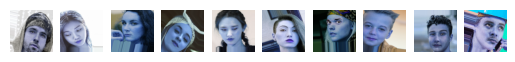

In [21]:
import matplotlib.pyplot as plt

# Preview augmented images
for X_batch, y_batch in train_generator:
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(X_batch[i])
        plt.axis('off')
    plt.show()
    break  # just one batch preview


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions (as probabilities)
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# True labels
y_true = y_test  # Already used during generator creation

# Classification report
print("✅ Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Real", "Fake"]))

# Confusion matrix
print("✅ Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
✅ Classification Report:
              precision    recall  f1-score   support

        Real       0.61      0.72      0.66       217
        Fake       0.60      0.47      0.53       192

    accuracy                           0.60       409
   macro avg       0.60      0.60      0.59       409
weighted avg       0.60      0.60      0.60       409

✅ Confusion Matrix:
[[157  60]
 [102  90]]


In [16]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.6571 - loss: 0.6356
✅ Test Accuracy: 62.59%
